# Catagorizando a los pokémon en grupos con base a sus puntos de ataque y defensa.

Al salir el juego de pokémon simplemente habían 150 pokémon diferentes tanto en aspecto como en tipos (agua, fuego, planta, etc.), pero con el paso de tiempo han ido saliendo nuevas generaciones y con ello un gran número de nuevos pokémon. Debido a la  cantidad de seguidores tanto de los juego como de las caricaturas de estos, sin mencionar el auge que obtuvo al lanzar la aplicación de Pokémon Go. Lo cual, ha hecho posible este incremento en los pokémon de pasar a los 150 que en su tiempo eran bastantes, a ser actualmente más de 800 pokémon.

Algunos de ellos consiguieron nuevas evoluciones (evolución mega), diferentes formas y con ello otro tipo de forma y habilidades, por ejemplo, el conocido pikachu que siempre salió como compañero de ash obtuvo una nueva forma conocida como forma Alola, este nombre proviene de la isla en la cual se encuentra esta forma de pikachu y que adquiere un nuevo tipo  'psíquico' lo cual hace que pase de un solo tipo 'eléctrico' a ser de de dos tipos 'eléctrico/psíquico', otro ejemplo, es el de charizard aquel pokémon que fue abandonado por su entrenador y rescatado por ash, consigue hacer una evolución más la cual se conoce como la 'Mega evolución'.

Después de esta breva actualización sobre Pokémon, se usará k-means para categorizarlos en grupos.

## Algoritmo de K-means (k-Medias)
Para llevar a cabo esta agrupación, se utliliza el algoritmo de k-means, el cual es un algoritmo de clasificación no
supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza
minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster.

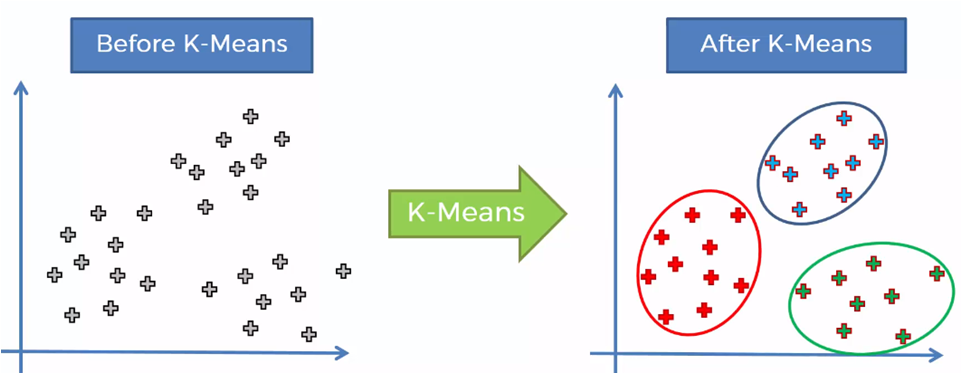

## Cómo funciona K-Means
El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas de nuestro conjunto de entrada forman una 
coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas).
### Pasos a seguir para llevar a cabo el algoritmo
1. Seleccionar el número de k grupos (clusters)
2. Generar aleatoriamente k puntos que llamaremos centroides
3. Asignar cada elemento del conjunto de datos al centroide más cercano para formar k grupos
4. Reasignar la posición de cada centroide
5. Reasignar los elementos de datos al centroide más cercano nuevamente
6. Los pasos de asignación y reasignación se repiten hasta que los centroides de los Clusters converjan; es decir, hasta que el valor de los centroides de la última iteración de actualización coincida con el valor de los centroides de la iteración anterior de actualización.

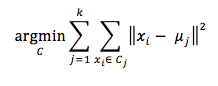

donde: k = número de clases (2, ataque y defensa),

x = número de objetos que se tienen (895 pokémos),

c = k (número de clases), su inicialización es aleatoria.

## Datos a usar
Para nuetro ejemplo usaremos los datos de Pokémon [datos_pokemon] agregando datos de la 7° generación de [generacion_7].

Los datos que usaremos son los puntos de ataque y defensa que se obtienen de las columnas 'Ataque' y 'Defensa' respectivamente, las cuales entre mayor sea el número significa que es mejor atacante o defensor.
Se harán tres grupos donde se irán asociando los que tengan caracteríscas similares, es decir, que tendremos tres grupos y dependiendo del grupo estarán los pokémon con su defensa mayor a su ataque (defensa mayor de 90),los pokémon con su defensa mayor a su ataque (defensa menor de 90) y los pokémon con su ataque mayor a su defensa.

[datos_pokemon]: https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6
[generacion_7]: https://bulbapedia.bulbagarden.net/w/index.php?title=List_of_Pok%C3%A9mon_by_base_stats_(Generation_VII-present)&action=edit

In [307]:
# Primero se importa las librerias a usar
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [308]:
# Luego hacemos la lectura de los datos.
dataset = pd.read_csv('Pokemon.csv')
# Extraemos los datos a utilizar
datos = dataset[['Nombre','Ataque','Defensa']]
ataque = datos['Ataque'].values
defensa = datos['Defensa'].values
datos.head(10)

,Nombre,Ataque,Defensa
0,Bulbasaur,49,49
1,Ivysaur,62,63
2,Venusaur,82,83
3,VenusaurMega Venusaur,100,123
4,Charmander,52,43
5,Charmeleon,64,58
6,Charizard,84,78
7,CharizardMega Charizard X,130,111
8,CharizardMega Charizard Y,104,78
9,Squirtle,48,65


In [309]:
# Colocamos los datos en una lista de listas
datos_sin_agrupar = np.array(list(zip(ataque,defensa)))
# Mostramos el total y los datos a agrupar
print(len(datos_sin_agrupar))
print(datos_sin_agrupar)

895
[[ 49  49]
 [ 62  63]
 [ 82  83]
 ...
 [112  75]
 [ 65  65]
 [143 143]]


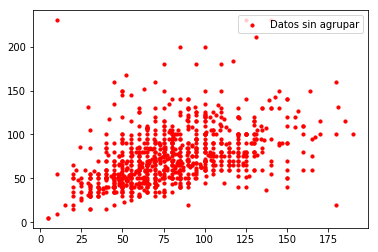

In [310]:
# Graficamos los puntos sin clasificar en un diagrama de dispersión, para visualizar como se encuentran los datos.
plt.scatter(ataque,defensa, c='red', s=10,label="Datos sin agrupar")
plt.legend(loc='upper right')

In [311]:
# Declaramos el total de clases
k = 3
# Obtenemos los centroides en x de forma aleatoria
C_x = np.random.randint(0, np.max(datos_sin_agrupar), size=k)
# Obtenemos los centroides en y de forma aleatoria
C_y = np.random.randint(0, np.max(datos_sin_agrupar), size=k)
# Inicialiazamos los centroides de manera aleatoria
centroides = np.array(list(zip(C_x, C_y)), dtype=np.float32)
# Mostramos lo centroides que hemos obtenido.
print(centroides)

[[ 48.  49.]
 [ 62. 154.]
 [189.  32.]]


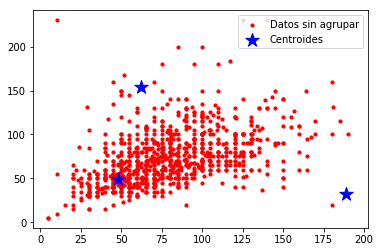

In [312]:
# Mostramos los datos sin agrupar junto con los centroides
plt.scatter(ataque, defensa, c='red', s=10, label='Datos sin agrupar')
plt.scatter(C_x, C_y, marker='*', s=200, c='b', label='Centroides')
plt.legend(loc='upper right')

In [313]:
# Función para calcular la distancia euclidiana
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [319]:
# Almacenamos los centroides para comparar con los nuevos centroides y saber sí se sigue iterando o no.
# Inicialimos en 0 debido a que antes de calcular los centroides de manera aleatoria no había centroides
centroides_anteriores = np.zeros(centroides.shape)

# Inicializamos el cluster donde se irán almacenando las etiquetas(grupos) a las que pertenencen cada uno de los datos.
clusters = np.zeros(len(datos_sin_agrupar))

# calculamos la distancia entre los centroides anteriores con los nuevos.
convergen = dist(centroides, centroides_anteriores, None)

# Iteramos hasta que nuestros centroides y centroides anteriores converjan, es decir, que sean iguales con lo cual se han 
# estabilizado.
while convergen != 0:
    # Asignamos cada valor a su cluster más cercano
    for i in range(len(datos_sin_agrupar)):
        distancias = dist(datos_sin_agrupar[i], centroides)
        cluster = np.argmin(distancias)
        clusters[i] = cluster
        
    # Almacenamos los valores del centroide para comparar con los nuevos centroides
    centroides_anteriores = deepcopy(centroides)
    
    # Obtenemos los nuevos centroides tomando el valor promedio de los elementos
    for i in range(k):
        points = [datos_sin_agrupar[j] for j in range(len(datos_sin_agrupar)) if clusters[j] == i]
        centroides[i] = np.mean(points, axis=0)
        
    convergen = dist(centroides, centroides_anteriores, None)
    
# Agregamos la etiqueta que se ha genera en el cluster (número de cluster al que pertenece el dato).    
datos_etiquetados = datos.copy()
datos_etiquetados ['etiquetas'] = clusters

Text(0.5,1,'Datos agrupados')

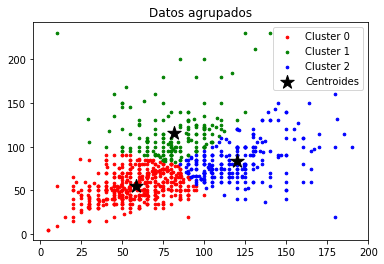

In [320]:

# Declaramos una serie de colores para mostrar los datos con diferente colores dependiendo en el cluster que esten.
colors = ['r', 'g', 'b', 'y', 'c', 'm']

# Creamos solo una figura y solo un subplot
fig, ax = plt.subplots()

# Mostramos los datos que pertenecen a cierto cluster con un color diferente
for i in range(k):
        points = np.array([datos_sin_agrupar[j] for j in range(len(datos_sin_agrupar)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label='Cluster ' + str(i))
        
# Mostramos los centroides que se han estabilizado      
ax.scatter(centroides[:, 0], centroides[:, 1], marker='*', s=200, c='black', label='Centroides')
ax.legend(loc='best')
ax.set_title('Datos agrupados')

In [321]:
datos_agrupados.head(10)

,Nombre,Ataque,Defensa,labels
0,Bulbasaur,49,49,1.0
1,Ivysaur,62,63,1.0
2,Venusaur,82,83,2.0
3,VenusaurMega Venusaur,100,123,0.0
4,Charmander,52,43,1.0
5,Charmeleon,64,58,1.0
6,Charizard,84,78,2.0
7,CharizardMega Charizard X,130,111,2.0
8,CharizardMega Charizard Y,104,78,2.0
9,Squirtle,48,65,1.0


## Resultados
Después de implementar el algoritmo a los datos se colocaron en 3 grupos o como se había mencionada anteriormente, en los que 
cada grupo contiene características similares y los resultados fueron los siguientes:
    1. En el grupo 1(cluster 0) se encuentran todos los pokémon que su defensa es mayor a su ataque (defensa mayor de 90).
    2. En el grupo 2(cluster 1) se encuentran todos los pokémon que su defensa es mayor a su ataque (defensa menor de 90). 
    3. En el grupo 3(cluster 2) se encuentran todos los pokémon que su ataque es mayor a su defensa.



# Referencias
1. [Jacobsoft]
2. [Unioviedo]

[Jacobsoft]: http://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/
[Unioviedo]: https://www.unioviedo.es/compnum/laboratorios_py/kmeans/kmeans.html